Imports

In [1]:
import perceval as pcvl
from perceval.components import BS
import numpy as np

We want to reproduce the following circuit:

![](cnot_image.png)

In [2]:
theta_13 = BS.r_to_theta(r=1/3)

cnot = (pcvl.Circuit(6, name = "Ralph CNOT")
        .add((0, 1), BS.H(theta_13, phi_bl = np.pi, phi_tr = np.pi/2, phi_tl = -np.pi/2))
        .add((3, 4), BS.H())
        .add((2, 3), BS.H(theta_13, phi_bl = np.pi, phi_tr = np.pi/2 , phi_tl = -np.pi/2))
        .add((4, 5), BS.H(theta_13))
        .add((3, 4), BS.H()))

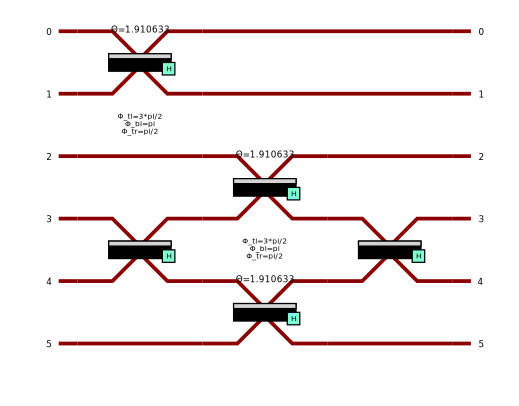

In [3]:
pcvl.pdisplay(cnot)

In [4]:
#pcvl.pdisplay(cnot.compute_unitary())

Postselected states are those containing one photon in the modes {1,2} and the other in the modes {3,4}

In [7]:
post_selection_rule = pcvl.PostSelect("[1,2] == 1 & [3,4] == 1")

In [8]:
cnot_processor = pcvl.Processor("SLOS", cnot)

In [9]:
cnot_processor.set_postselection(post_selection_rule)

In [10]:
states = {pcvl.BasicState ([0,1,0,1,0,0]): "00",
          pcvl.BasicState ([0,1,0,0,1,0]): "01",
          pcvl.BasicState ([0,0,1,1,0,0]): "10",
          pcvl.BasicState ([0,0,1,0,1,0]): "11"}

In [11]:
analyzer = pcvl.algorithm.Analyzer(cnot_processor, states)

In [12]:
pcvl.pdisplay(analyzer)

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


Alternatively, simulating the sampling process:

In [13]:
cnot_processor.with_input(pcvl.BasicState([0,0,1,0,1,0]))

In [14]:
sampler = pcvl.algorithm.Sampler(cnot_processor)

sample_count = sampler.sample_count(1000)
print(sample_count['results'])

{
  |0,0,1,1,0,0>: 1000
}


Adding some noise:

In [ ]:
noisy_source = pcvl.Source(losses = 0.9,
                           emission_probability = 1.0,
                           multiphoton_component = 0.1,
                           indistinguishability = 0.9)

In [ ]:
noisy_processor = pcvl.Processor("SLOS", source = noisy_source)

In [ ]:
noisy_processor.set_circuit(cnot)

In [ ]:
noisy_processor.with_input(pcvl.BasicState([0,0,1,0,1,0]))

In [ ]:
noisy_processor.set_postselection(post_selection_rule)

In [ ]:
sampler = pcvl.algorithm.Sampler(noisy_processor)

sample_count = sampler.sample_count(1000)
print(sample_count['results'])